### This script is to find factors that may potentially impact prices of Airbnb homes through comparative analysis for datasets of two cities --- Boston vs Seattle.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

%matplotlib inline

In [2]:
data_path_bos = "E://Udacity//Project1//data//Boston//"
data_path_sea = "E://Udacity//Project1//data//Seattle//"
result_path = "E://Udacity//Project1//results//"
graph_path = "E://Udacity//Project1//graphs//"

In [3]:
#Load datasets
cal_bos = pd.read_csv(data_path_bos + "calendar.csv")
lis_bos = pd.read_csv(data_path_bos + "listings.csv")
rev_bos = pd.read_csv(data_path_bos + "reviews.csv")

cal_sea = pd.read_csv(data_path_sea + "calendar.csv")
lis_sea = pd.read_csv(data_path_sea + "listings.csv")
rev_sea = pd.read_csv(data_path_sea + "reviews.csv")

### Business Understanding
- Question 1: Does location pose potential impacts on price variation?
- Question 2: Does time pose potential impacts on price variation?
- Question 3: What may be the main factors used to predict price after all?

### Data Understanding

In [4]:
cal_bos.head(2)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [5]:
cal_bos.shape

(1308890, 4)

In [6]:
lis_bos.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [7]:
lis_bos.shape

(3585, 95)

In [8]:
rev_bos.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...


In [9]:
rev_bos.shape

(68275, 6)

In [10]:
cal_sea.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [11]:
cal_sea.shape

(1393570, 4)

In [12]:
lis_sea.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [13]:
lis_sea.shape

(3818, 92)

In [14]:
rev_sea.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [15]:
rev_sea.shape

(84849, 6)

In [16]:
cal_bos.info(), cal_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


(None, None)

In [17]:
rev_bos.info(), rev_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+

(None, None)

In [18]:
lis_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [19]:
lis_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [20]:
print("Boston Airbnb data has {} listings, whose properties has been rented out by {} hosts."\
     .format(lis_bos.shape[0], lis_bos.host_id.nunique()))
print("The availability of Boston Airbnb data is from {} to {}.".format(cal_bos.date.min(), cal_bos.date.max()))
print("Boston Airbnb data has {} reviews, which have been provided from {} to {}."\
     .format(rev_bos.shape[0], rev_bos.date.min(), rev_bos.date.max()))

Boston Airbnb data has 3585 listings, whose properties has been rented out by 2181 hosts.
The availability of Boston Airbnb data is from 2016-09-06 to 2017-09-05.
Boston Airbnb data has 68275 reviews, which have been provided from 2009-03-21 to 2016-09-06.


In [21]:
print("Seattle Airbnb data has {} listings, whose properties has been rented out by {} hosts."\
     .format(lis_sea.shape[0], lis_sea.host_id.nunique()))
print("The availability of Seattle Airbnb data is from {} to {}.".format(cal_sea.date.min(), cal_sea.date.max()))
print("Seattle Airbnb data has {} reviews, which have been provided from {} to {}."\
     .format(rev_sea.shape[0], rev_sea.date.min(), rev_sea.date.max()))

Seattle Airbnb data has 3818 listings, whose properties has been rented out by 2751 hosts.
The availability of Seattle Airbnb data is from 2016-01-04 to 2017-01-02.
Seattle Airbnb data has 84849 reviews, which have been provided from 2009-06-07 to 2016-01-03.


### Data Preparation (data wrangling)

#### Quality issues
- 1. id-related columns are in integer rather than string
- 2. Time-related columns are in string rather than datetime
- 3. Price columns are in string rather than numeric format
- 4. Price columns have missing or null values

#### Tidness issues
- 1. There are lots of columns that are actually unnecessary or cannot be used for analyses

In [22]:
#Solution for Q1: Convert id-related columns to string format
lis_bos = lis_bos.astype({"id":str, "scrape_id":str, "host_id":str})
cal_bos = cal_bos.astype({"listing_id":str})
rev_bos = rev_bos.astype({"listing_id":str, "id":str, "reviewer_id":str})

In [23]:
#Solution for Q2: Convert time-related columns to datetime format
cal_bos["date"] = pd.to_datetime(cal_bos["date"])
cal_sea["date"] = pd.to_datetime(cal_sea["date"])

rev_bos["date"] = pd.to_datetime(rev_bos["date"])
rev_sea["date"] = pd.to_datetime(rev_sea["date"])

lis_bos["host_since"] = pd.to_datetime(lis_bos["host_since"])
lis_sea["host_since"] = pd.to_datetime(lis_sea["host_since"])

In [24]:
#Derive different levels of time units (e.g., month, day in a year, day in a week) from datetime columns
#for the ease of statistics/ visualizations for time changes
cal_bos["month"] = cal_bos["date"].dt.month
cal_bos["week_day"] = cal_bos["date"].dt.day_name()
cal_bos["year_day"] = cal_bos["date"].dt.strftime("%d")
cal_sea["month"] = cal_sea["date"].dt.month
cal_sea["week_day"] = cal_sea["date"].dt.day_name()
cal_sea["year_day"] = cal_sea["date"].dt.strftime("%d")

rev_bos["month"] = rev_bos["date"].dt.month
rev_bos["week_day"] = rev_bos["date"].dt.day_name()
rev_bos["year_day"] = rev_bos["date"].dt.strftime("%d")
rev_sea["month"] = rev_sea["date"].dt.month
rev_sea["week_day"] = rev_sea["date"].dt.day_name()
rev_sea["year_day"] = rev_sea["date"].dt.strftime("%d")

lis_bos["month_since"] = lis_bos["host_since"].dt.month
lis_bos["week_day_since"] = lis_bos["host_since"].dt.day_name()
lis_bos["year_day_since"] = lis_bos["host_since"].dt.strftime("%d")
lis_sea["month_since"] = lis_sea["host_since"].dt.month
lis_sea["week_day_since"] = lis_sea["host_since"].dt.day_name()
lis_sea["year_day_since"] = lis_sea["host_since"].dt.strftime("%d")

In [25]:
#Solution for Q3: Convert price column to numeric format (in this case integer format since all numbers in decimal places are zeros)
#For Boston
lis_bos["price"] = lis_bos["price"].str.replace("$", "", regex=True).replace(",", "", regex=True)
lis_bos["price"] = lis_bos["price"].astype(float).astype(int)
lis_bos.rename(columns={"price": "price_$"}, inplace=True)

In [26]:
#For Seattle
lis_sea["price"] = lis_sea["price"].str.replace("$", "", regex=True).replace(",", "", regex=True)
lis_sea["price"] = lis_sea["price"].astype(float).astype(int)
lis_sea.rename(columns={"price": "price_$"}, inplace=True)

In [27]:
#Solution for T1: Identify columns that have high percentages of missing values then drop those columns
#Calculate percentages of missing values for each column
#For Boston
percent_missing_bos = lis_bos.isnull().sum() * 100 / len(lis_bos)
missing_value_bos = pd.DataFrame({"column_name": lis_bos.columns, "percent_missing": percent_missing_bos})
#Only show columns that actually have missing values
missing_value_bos = missing_value_bos[missing_value_bos["percent_missing"] != 0]
missing_value_bos = missing_value_bos.reset_index(drop=True)
missing_value_bos.sort_values("percent_missing", ascending=False, inplace=True)

In [29]:
missing_value_bos

,column_name,percent_missing
42,jurisdiction_names,100.000000
41,license,100.000000
18,neighbourhood_group_cleansed,100.000000
31,has_availability,100.000000
26,square_feet,98.437936
28,monthly_price,75.230126
27,weekly_price,75.118550
29,security_deposit,62.566248
3,notes,55.090656
6,interaction,43.347280


In [30]:
#For Seattle
percent_missing_sea = lis_sea.isnull().sum() * 100 / len(lis_sea)
missing_value_sea = pd.DataFrame({"column_name": lis_sea.columns, "percent_missing": percent_missing_sea})
#Only show columns that actually have missing values
missing_value_sea = missing_value_sea[missing_value_sea["percent_missing"] != 0]
missing_value_sea = missing_value_sea.reset_index(drop=True)
missing_value_sea.sort_values("percent_missing", ascending=False, inplace=True)

In [31]:
missing_value_sea

,column_name,percent_missing
43,license,100.000000
29,square_feet,97.459403
31,monthly_price,60.267156
32,security_deposit,51.126244
30,weekly_price,47.380828
3,notes,42.063908
2,neighborhood_overview,27.029859
33,cleaning_fee,26.977475
4,transit,24.463070
11,host_about,22.498690


In [32]:
#Drop unnecessary columns from Boston dataset
dropped_columns_bos = ["jurisdiction_names", "license", "neighbourhood_group_cleansed", "has_availability", \
                      "square_feet", "monthly_price", "weekly_price", "security_deposit", "notes", "interaction", "access"]
lis_bos.drop(dropped_columns_bos, axis=1, inplace=True)

In [33]:
#Drop unnecessary columns from Seattle dataset
dropped_columns_sea = ["license", "square_feet", "monthly_price", "security_deposit", "weekly_price", "notes"]
lis_sea.drop(dropped_columns_sea, axis=1, inplace=True)

### Define Functions

In [34]:
#Generate geographic distribution of specified variable
def point_map(df1, df2, x_var, y_var, hue_var, palette, x_lab, y_lab, title1, title2, output_name):
    
    """Generate geographic distribution of specified variable."""
    
    fig = plt.figure(figsize=(20,8))
    
    #Set a one-row + two columns plot, create the first subplot (left)
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df1, x=x_var, y=y_var, hue=hue_var, palette=palette)
    plt.xlabel(x_lab, fontsize=15)
    plt.ylabel(y_lab, fontsize=15)
    plt.title(title1, fontsize=18)
    
    #Set a one-row + two columns plot, create the second subplot (right)
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df2, x=x_var, y=y_var, hue=hue_var, palette=palette)
    plt.xlabel(x_lab, fontsize=15)
    plt.ylabel(y_lab, fontsize=15)
    plt.title(title2, fontsize=18)
    
    #Save the plot as an image then show it in notebook
    plt.savefig(graph_path + output_name)
    plt.show()
    plt.close()

In [35]:
#Generate line graph indicating changes in prices over time
def time_change(df1, df2, x_var, y_var, color_list, label_list, x_lab, y_lab, title, output_name):
    
    """Generate line graph indicating changes in prices over time."""
    
    fig = plt.figure(figsize=(10,5))
    
    ax = fig.add_axes([0,0,1,1])
    ax.plot(df1[x_var], df1[y_var], color_list[0], label=label_list[0])
    ax.plot(df2[x_var], df2[y_var], color_list[1], label=label_list[1])
    ax.legend(loc="best")
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    plt.title(title)
    
    #Save the plot as an image then show it in notebook
    plt.savefig(graph_path + output_name, bbox_inches="tight")
    plt.show()
    plt.close()

In [36]:
#Map out collinearity between each pair of numeric variables
def collinearity_map(df, output_name):
    
    """Map out collinearity between each pair of numeric variables."""
    
    corr_df = df.corr()
    
    f, ax = plt.subplots(figsize=(10, 10))
    
    #Set the color ramp for the plot
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Mask out the duplicated half
    mask = np.zeros_like(corr_df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(corr_df, mask=mask, cmap=colormap, center=0, square=True, linewidths=.5, \
                cbar_kws={"shrink": .5}, vmax=corr_df[corr_df != 1.0].max().max())
    
    #Save the plot as an image then show it in notebook
    plt.savefig(graph_path + output_name, bbox_inches="tight")
    plt.show()
    plt.close()

In [37]:
#Evaluate error metrics for different models
def error_evaluator(y_test, y_predict):
    
    """Evaluate error metrics for different models."""
    
    print("R2 Score: {}".format(metrics.r2_score(y_test, y_predict)))
    print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_predict)))
    print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_predict)))

In [66]:
#Rank importance levels for factors that may contribute to price
def importance_ranker(x_train, model_result, title, output_name):
    
    """Rank importance levels for factors that may contribute to price."""
    
    #Get feature importances from the model
    headers = ["name", "score"]
    values = sorted(zip(x_train.columns, model_result.feature_importances_), key=lambda x: x[1] * -1)
    feature_importances = pd.DataFrame(values, columns = headers)
    feature_importances = feature_importances.sort_values(by = ["score"], ascending = False)
    #Get the top 15 most important factors 
    features = feature_importances["name"][:15]
    y_pos = np.arange(len(features))
    scores = feature_importances["score"][:15]

    #Plot feature importances
    plt.figure(figsize=(20,8))
    plt.bar(y_pos, scores, align="center", color="Royalblue")
    plt.xticks(y_pos, features, rotation="vertical")
    plt.xlabel("Features", fontsize=15)
    plt.ylabel("Score", fontsize=15)
    plt.title(title, fontsize=18)
    sns.set(style="whitegrid")
    plt.rcParams["axes.grid"] = False;
    
    #Save the plot as an image then show it in notebook
    plt.savefig(graph_path + output_name, bbox_inches="tight")
    plt.show()
    plt.close()

### Execute Functions

#### Q1: Does location pose potential impacts on price variation?

- ##### Q1.1 What is the geography of prices?

In [38]:
#Roughly explore numeric distribution of prices in Boston
lis_bos["price_$"].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price_$, dtype: float64

In [39]:
#Define price levels based on the distribution
conditions = [(lis_bos["price_$"]<=85), 
             (lis_bos["price_$"]>85) & (lis_bos["price_$"]<=150),
             (lis_bos["price_$"]>150) & (lis_bos["price_$"]<=220),
             (lis_bos["price_$"]>220)]

values = ["Cheap", "Medium", "Expensive", "Very Expensive"]

lis_bos["price_level"] = np.select(conditions, values)

In [40]:
#Roughly explore numeric distribution of prices in Seattle
lis_sea["price_$"].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price_$, dtype: float64

In [41]:
#Define price levels based on the distribution
conditions2 = [(lis_sea["price_$"]<=75), 
             (lis_sea["price_$"]>75) & (lis_sea["price_$"]<=100),
             (lis_sea["price_$"]>100) & (lis_sea["price_$"]<=150),
             (lis_sea["price_$"]>150)]

lis_sea["price_level"] = np.select(conditions2, values)

In [42]:
palette1 = {"Very Expensive":"maroon", "Expensive":"lightcoral", "Medium":"gold", "Cheap":"moccasin"}

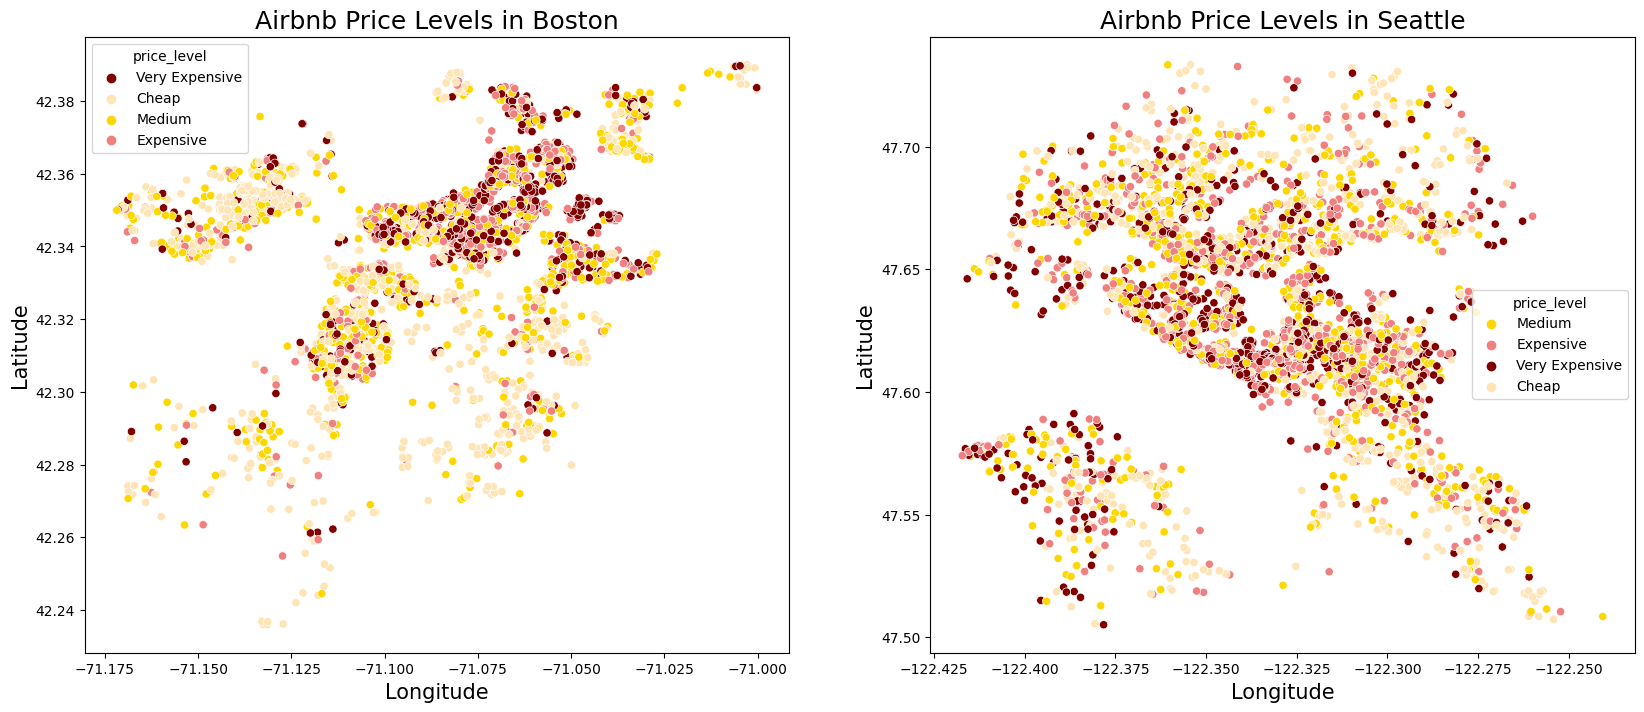

In [43]:
point_map(lis_bos, lis_sea, "longitude", "latitude", "price_level", palette1, "Longitude", "Latitude", \
          "Airbnb Price Levels in Boston", "Airbnb Price Levels in Seattle", "Map_PriceLevel.png")

For Boston, the "expensive" and "very expensive" Airbnbs are clustered within urban centers while "cheap" and "medium" Airbnbs are mostly located at suburban residential areas.

For Seattle, though the overall geographic pattern of price levels is more "mixing", it reveals similar distribution features as Boston's --- "expensive" and "very expensive" Airbnbs mostly distribute around the Seattle Center while "cheap" Airbnbs in particular sparsely distribute in Northern, Southwestern, and Southern suburbs. 

- ##### Q1.2 What is the geography of room types?

In [44]:
palette2 = sns.color_palette()

C:\Users\btian\AppData\Local\Temp\ipykernel_22836\3057883940.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=df1, x=x_var, y=y_var, hue=hue_var, palette=palette)
C:\Users\btian\AppData\Local\Temp\ipykernel_22836\3057883940.py:13: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=df2, x=x_var, y=y_var, hue=hue_var, palette=palette)


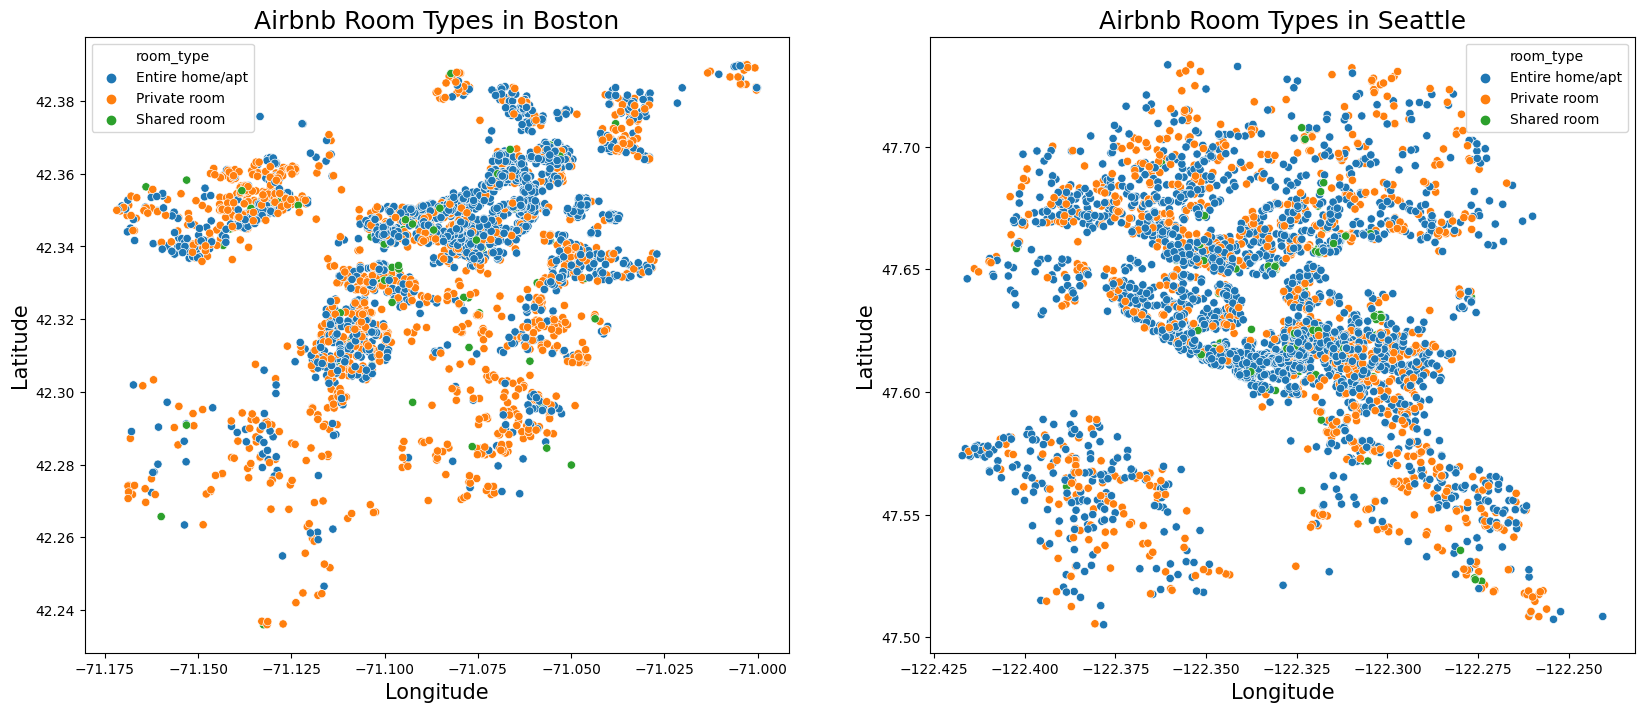

In [45]:
point_map(lis_bos, lis_sea, "longitude", "latitude", "room_type", palette2, "Longitude", "Latitude", \
          "Airbnb Room Types in Boston", "Airbnb Room Types in Seattle", "Map_RoomType.png")

For both cities, room types for Airbnbs in city centers are dominated by "entire home/apt" and "shared room" is not a common room type. 

For Boston, its suburbs have distinct clusters of "private room". 

For Seattle, "entire home/apt" and "private room" are mixed in suburbs, which is a difference from Boston.

- ##### Q1.3 Where are the top 5 most rated Airbnb neighborhood located?

In [46]:
top5_bos = lis_bos["neighbourhood_cleansed"].value_counts().sort_values(ascending=False)[:5]
top5_sea = lis_sea["neighbourhood_cleansed"].value_counts().sort_values(ascending=False)[:5]

In [47]:
top5_bos_list = list(top5_bos.index)
top5_sea_list = list(top5_sea.index)

In [48]:
lis_bos_top5 = lis_bos[lis_bos["neighbourhood_cleansed"].isin(top5_bos_list)]
lis_sea_top5 = lis_sea[lis_sea["neighbourhood_cleansed"].isin(top5_sea_list)]

C:\Users\btian\AppData\Local\Temp\ipykernel_22836\3057883940.py:7: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(data=df1, x=x_var, y=y_var, hue=hue_var, palette=palette)
C:\Users\btian\AppData\Local\Temp\ipykernel_22836\3057883940.py:13: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(data=df2, x=x_var, y=y_var, hue=hue_var, palette=palette)


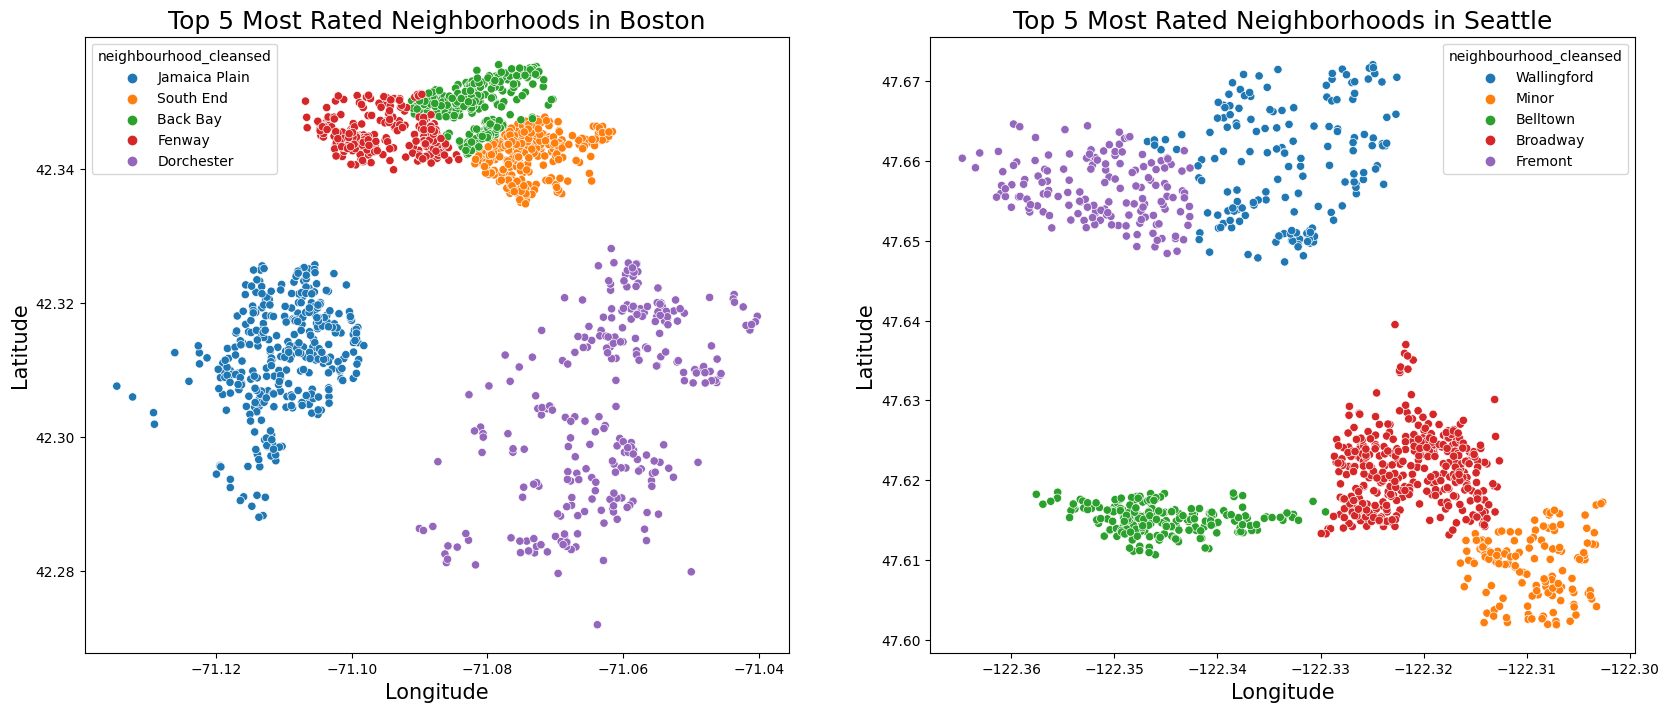

In [49]:
point_map(lis_bos_top5, lis_sea_top5, "longitude", "latitude", "neighbourhood_cleansed", palette2, "Longitude", "Latitude", \
          "Top 5 Most Rated Neighborhoods in Boston", "Top 5 Most Rated Neighborhoods in Seattle", "Map_Top5Neighborhood.png")

For Boston, the top 5 most rated neighborhoods are 'Jamaica Plain', 'South End', 'Back Bay', 'Fenway', 'Dorchester'. The three adjacent neighborhoods 'South End', 'Back Bay', 'Fenway' are within or close to the urban center.

For Seattle, the top 5 most rated neighborhoods are 'Broadway', 'Belltown', 'Wallingford', 'Fremont', 'Minor'. The three adjacent neighborhoods 'Broadway', 'Belltown', 'Minor' are within or close to the urban center.

#### Q2: Does time pose potential impacts on price variation?

In [50]:
#Exclude records with nan in price
cal_bos_tp = cal_bos[cal_bos["price"].isnull() == False]
cal_sea_tp = cal_sea[cal_sea["price"].isnull() == False]

#Convert price column from string to number
cal_bos_tp["price"] = cal_bos_tp["price"].str.replace("$", "", regex=True).replace(",", "", regex=True)
cal_bos_tp["price"] = cal_bos_tp["price"].astype(float).astype(int)
cal_bos_tp.rename(columns={"price": "price_$"}, inplace=True)

cal_sea_tp["price"] = cal_sea_tp["price"].str.replace("$", "", regex=True).replace(",", "", regex=True)
cal_sea_tp["price"] = cal_sea_tp["price"].astype(float).astype(int)
cal_sea_tp.rename(columns={"price": "price_$"}, inplace=True)

C:\Users\btian\AppData\Local\Temp\ipykernel_22836\3080500616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal_bos_tp["price"] = cal_bos_tp["price"].str.replace("$", "", regex=True).replace(",", "", regex=True)
C:\Users\btian\AppData\Local\Temp\ipykernel_22836\3080500616.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal_bos_tp["price"] = cal_bos_tp["price"].astype(float).astype(int)
C:\Users\btian\AppData\Local\Temp\ipykernel_22836\3080500616.py:8: SettingWithCopyWarning: 
A value is trying to b

In [51]:
#Calculate averaged prices for each day
cal_bos_tp = cal_bos_tp.groupby(["date"])["price_$"].mean().reset_index()
cal_sea_tp = cal_sea_tp.groupby(["date"])["price_$"].mean().reset_index()

In [52]:
color_list = ["tomato", "lightseagreen"]
label_list = ["Boston", "Seattle"]

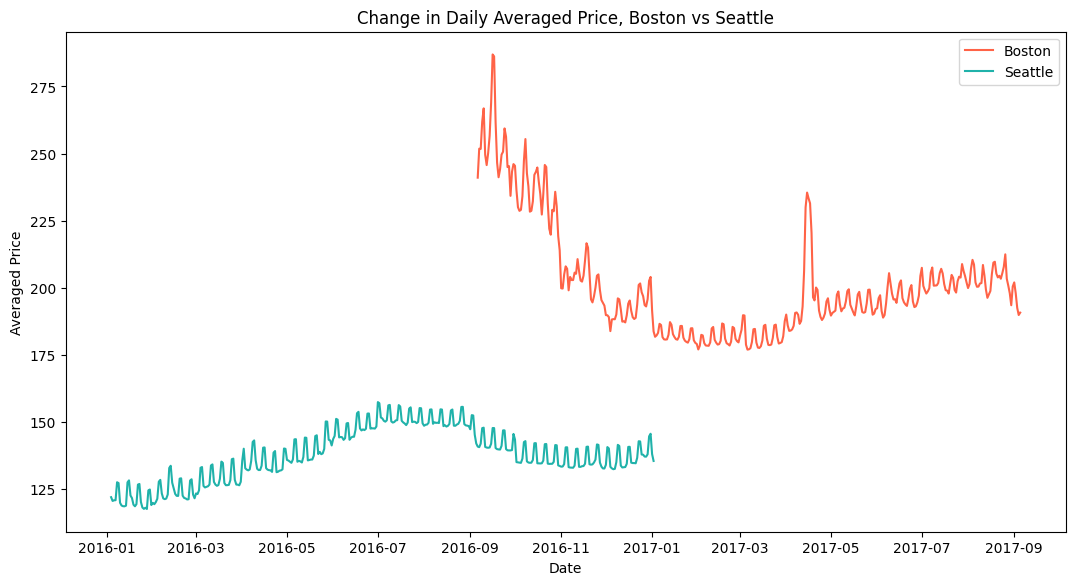

In [53]:
time_change(cal_bos_tp, cal_sea_tp, "date", "price_$", color_list, label_list, "Date", "Averaged Price", \
            "Change in Daily Averaged Price, Boston vs Seattle", "Plot_PriceChange.png")

It is conspicuous that daily averaged prices for Airbnbs in Boston at least $25 more expensive than Airbnbs in Seattle. 

For both cities, prices started to increase from May then reached an overall "peak period" during Summer. However, Boston experienced a much higher and fluctuated "peak period" back in Winter 2016 while prices in Seattle during the same time frame maintained at relatively low level.

#### Q3: What may be the main factors used to predict price after all?

### Modeling & Evaluation

- #### Boston

In [54]:
#Prepare dataframe for regression analysis
#Preserve numeric variables
numeric_features = lis_bos.dtypes[lis_bos.dtypes != "object"].index.tolist()
df_reg_bos = pd.DataFrame(lis_bos[numeric_features])
#Log-transformation for price as dependent variable
df_reg_bos["price_$"] = np.log(df_reg_bos[["price_$"]])

C:\Users\btian\AppData\Local\Temp\ipykernel_22836\709440457.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()
C:\Users\btian\AppData\Local\Temp\ipykernel_22836\709440457.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_df, dtype=np.bool)


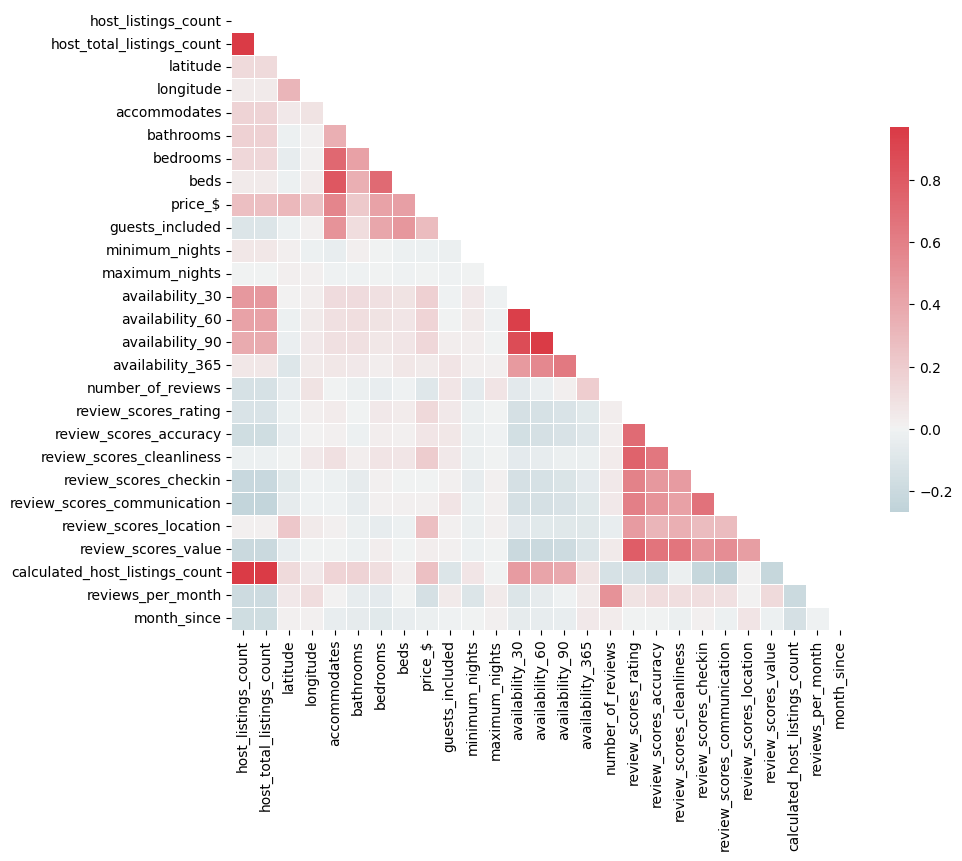

In [55]:
collinearity_map(df_reg_bos, "collinearity_map_bos.png")

Columns containing host_listings_count, host_total_listings_count, bedrooms, beds, availability_30, availability_60, availability_90, availability_365, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication are identified as variables with high collinearity.

In [56]:
#Dropping some colinear variables from the X 
#Drop all the null values since generation of training set and testing set requires no null values
df_reg_bos_nonull = df_reg_bos.dropna()
X_r_bos = df_reg_bos_nonull.drop(["price_$","host_listings_count", "host_total_listings_count", "host_since", "bedrooms", \
                       "beds", "availability_30", "availability_60", "availability_90", "availability_365", \
                       "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", \
                       "review_scores_communication"], axis=1)
y_r_bos = df_reg_bos_nonull[["price_$"]]

#Scaling
scaler = StandardScaler()
X_r_bos = pd.DataFrame(scaler.fit_transform(X_r_bos), columns=list(X_r_bos.columns))
y_r_bos = scaler.fit_transform(y_r_bos)

In [57]:
#Generate data for training and testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_r_bos, y_r_bos, test_size=0.2, random_state=42)
print('X_train1.shape: ', X_train1.shape, '\tX_test1.shape: ', X_test1.shape, '\nY_train1.shape: ', \
      y_train1.shape, '\tY_test1.shape: ', y_test1.shape)

X_train1.shape:  (2188, 14) 	X_test1.shape:  (548, 14) 
Y_train1.shape:  (2188, 1) 	Y_test1.shape:  (548, 1)


Linear Regression

In [58]:
lin_reg1 = LinearRegression()
lin_reg1 = lin_reg1.fit(X_train1, y_train1)
y_predict1_lin = lin_reg1.predict(X_test1)

In [59]:
error_evaluator(y_test1, y_predict1_lin)

R2 Score: 0.5832537797754014
Mean Absolute Error: 0.5129662289750938
Mean Squared Error: 0.42650252256086996


Decision Tree

In [60]:
tree_reg1 = DecisionTreeRegressor(criterion='mse',max_depth=3,random_state=0)
tree_reg1 = tree_reg1.fit(X_train1,y_train1)
y_predict1_tree = tree_reg1.predict(X_test1)

C:\Users\btian\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [61]:
error_evaluator(y_test1, y_predict1_tree)

R2 Score: 0.5643993361806499
Mean Absolute Error: 0.5374780700053147
Mean Squared Error: 0.4457983610457621


Random Forest

In [62]:
forest_reg1 = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42, n_jobs=-1, verbose=1)
forest_reg1 = forest_reg1.fit(X_train1,y_train1.squeeze())
y_predict1_forest = forest_reg1.predict(X_test1)

C:\Users\btian\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [63]:
error_evaluator(y_test1, y_predict1_forest)

R2 Score: 0.7260245868624228
Mean Absolute Error: 0.4047444583846638
Mean Squared Error: 0.2803893572444595


Since random forest model has lower mean absolute/ squared error and higher R2 score compared with the other two models, it is chosen to predict importances of factors potentially associated with prices.

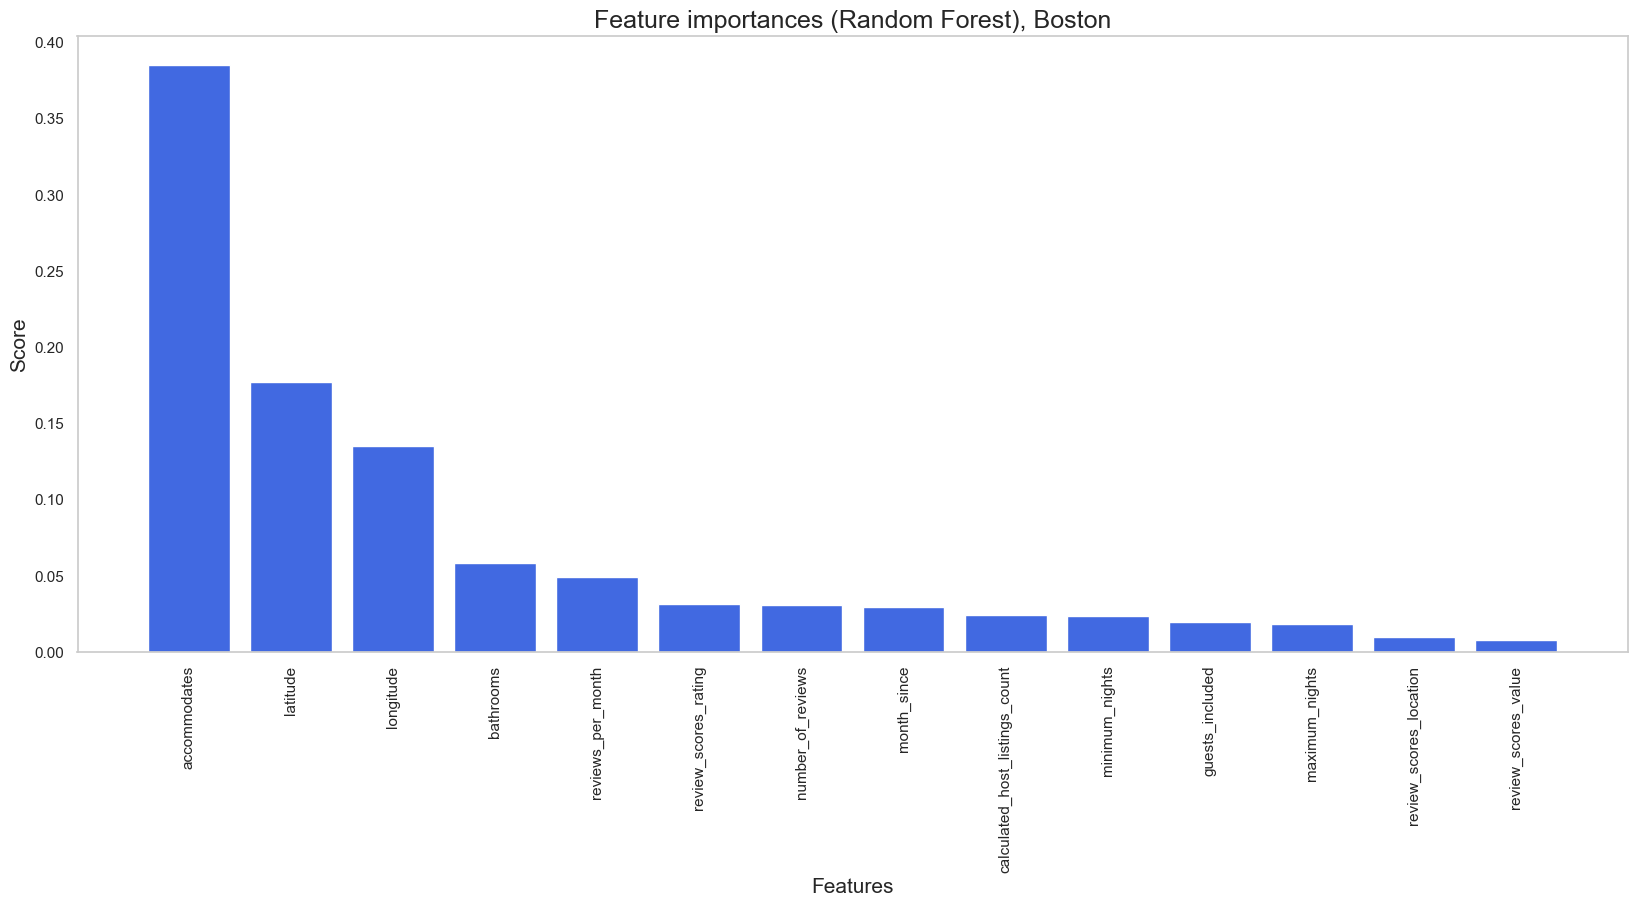

In [67]:
importance_ranker(X_train1, forest_reg1, "Feature importances (Random Forest), Boston", "importance_ranking_bos.png")

- #### Seattle

In [68]:
#Prepare dataframe for regression analysis
#Preserve numeric variables
lis_sea = lis_sea.astype({"id":str, "scrape_id":str, "host_id":str})
numeric_features_sea = lis_sea.dtypes[lis_sea.dtypes != "object"].index.tolist()
df_reg_sea = pd.DataFrame(lis_sea[numeric_features_sea])
#Log-transformation for price as dependent variable
df_reg_sea["price_$"] = np.log(df_reg_sea[["price_$"]])

C:\Users\btian\AppData\Local\Temp\ipykernel_22836\709440457.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()
C:\Users\btian\AppData\Local\Temp\ipykernel_22836\709440457.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_df, dtype=np.bool)


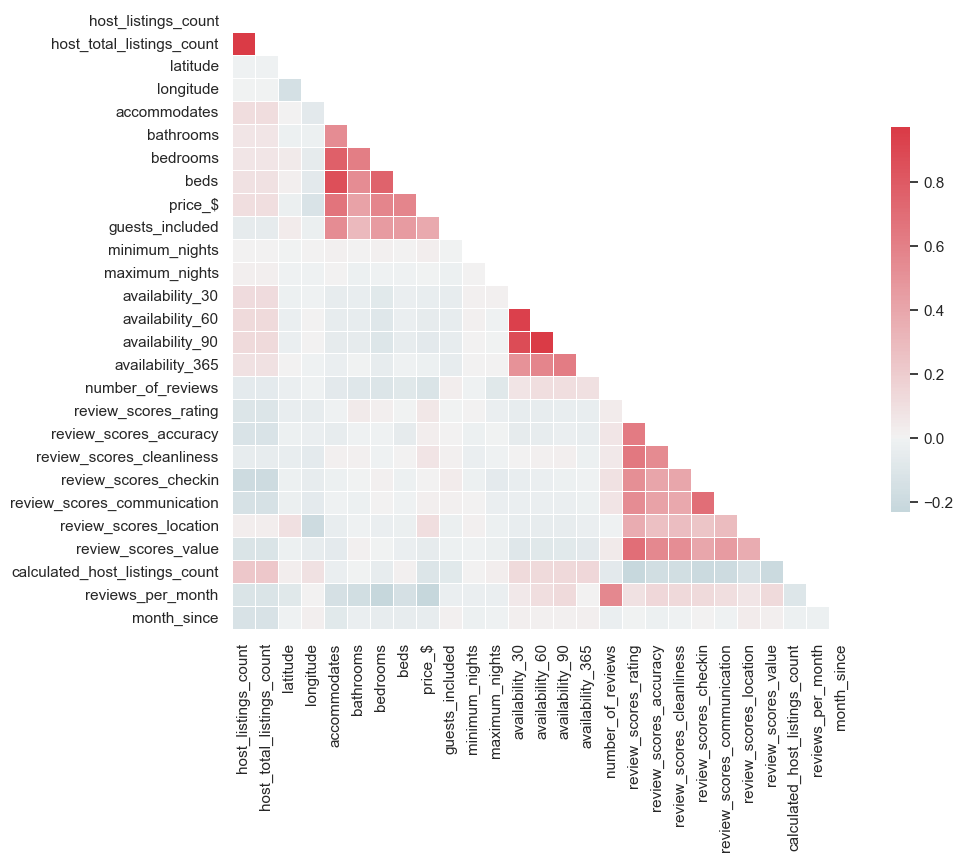

In [69]:
collinearity_map(df_reg_sea, "collinearity_map_sea.png")

Columns containing host_total_listings_count, bedrooms, beds, availability_30, availability_60, availability_90, availability_365, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication are identified as variables with high collinearity.

In [70]:
#Dropping some colinear variables from the X 
#Drop all the null values since generation of training set and testing set requires no null values
df_reg_sea_nonull = df_reg_sea.dropna()
X_r_sea = df_reg_sea_nonull.drop(["price_$", "host_total_listings_count", "host_since", "bedrooms", \
                       "beds", "availability_30", "availability_60", "availability_90", "availability_365", \
                       "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", \
                       "review_scores_communication"], axis=1)
y_r_sea = df_reg_sea_nonull[["price_$"]]

#Scaling
scaler = StandardScaler()
X_r_sea = pd.DataFrame(scaler.fit_transform(X_r_sea), columns=list(X_r_sea.columns))
y_r_sea = scaler.fit_transform(y_r_sea)

In [71]:
#Generate data for training and testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_r_sea, y_r_sea, test_size=0.2, random_state=42)
print('X_train2.shape: ', X_train2.shape, '\tX_test2.shape: ', X_test2.shape, '\nY_train2.shape: ', \
      y_train2.shape, '\tY_test2.shape: ', y_test2.shape)

X_train2.shape:  (2512, 15) 	X_test2.shape:  (628, 15) 
Y_train2.shape:  (2512, 1) 	Y_test2.shape:  (628, 1)


Linear Regression

In [72]:
lin_reg2 = LinearRegression()
lin_reg2 = lin_reg2.fit(X_train2, y_train2)
y_predict2_lin = lin_reg2.predict(X_test2)

In [73]:
error_evaluator(y_test2, y_predict2_lin)

R2 Score: 0.07891236142338887
Mean Absolute Error: 0.5705538891686193
Mean Squared Error: 0.9116741192735663


Decision Tree

In [74]:
tree_reg2 = DecisionTreeRegressor(criterion='mse',max_depth=3,random_state=0)
tree_reg2 = tree_reg2.fit(X_train2,y_train2)
y_predict2_tree = tree_reg2.predict(X_test2)

C:\Users\btian\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [75]:
error_evaluator(y_test2, y_predict2_tree)

R2 Score: 0.45221790304377996
Mean Absolute Error: 0.5731236813806228
Mean Squared Error: 0.5421837617624828


Random Forest

In [76]:
forest_reg2 = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42, n_jobs=-1, verbose=1)
forest_reg2 = forest_reg2.fit(X_train2,y_train2.squeeze())
y_predict2_forest = forest_reg2.predict(X_test2)

C:\Users\btian\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [77]:
error_evaluator(y_test2, y_predict2_forest)

R2 Score: 0.6143048668067788
Mean Absolute Error: 0.45878541774551823
Mean Squared Error: 0.38175332740912066


Since random forest model has lower mean absolute/ squared error and higher R2 score compared with the other two models, it is chosen to predict importances of factors potentially associated with prices.

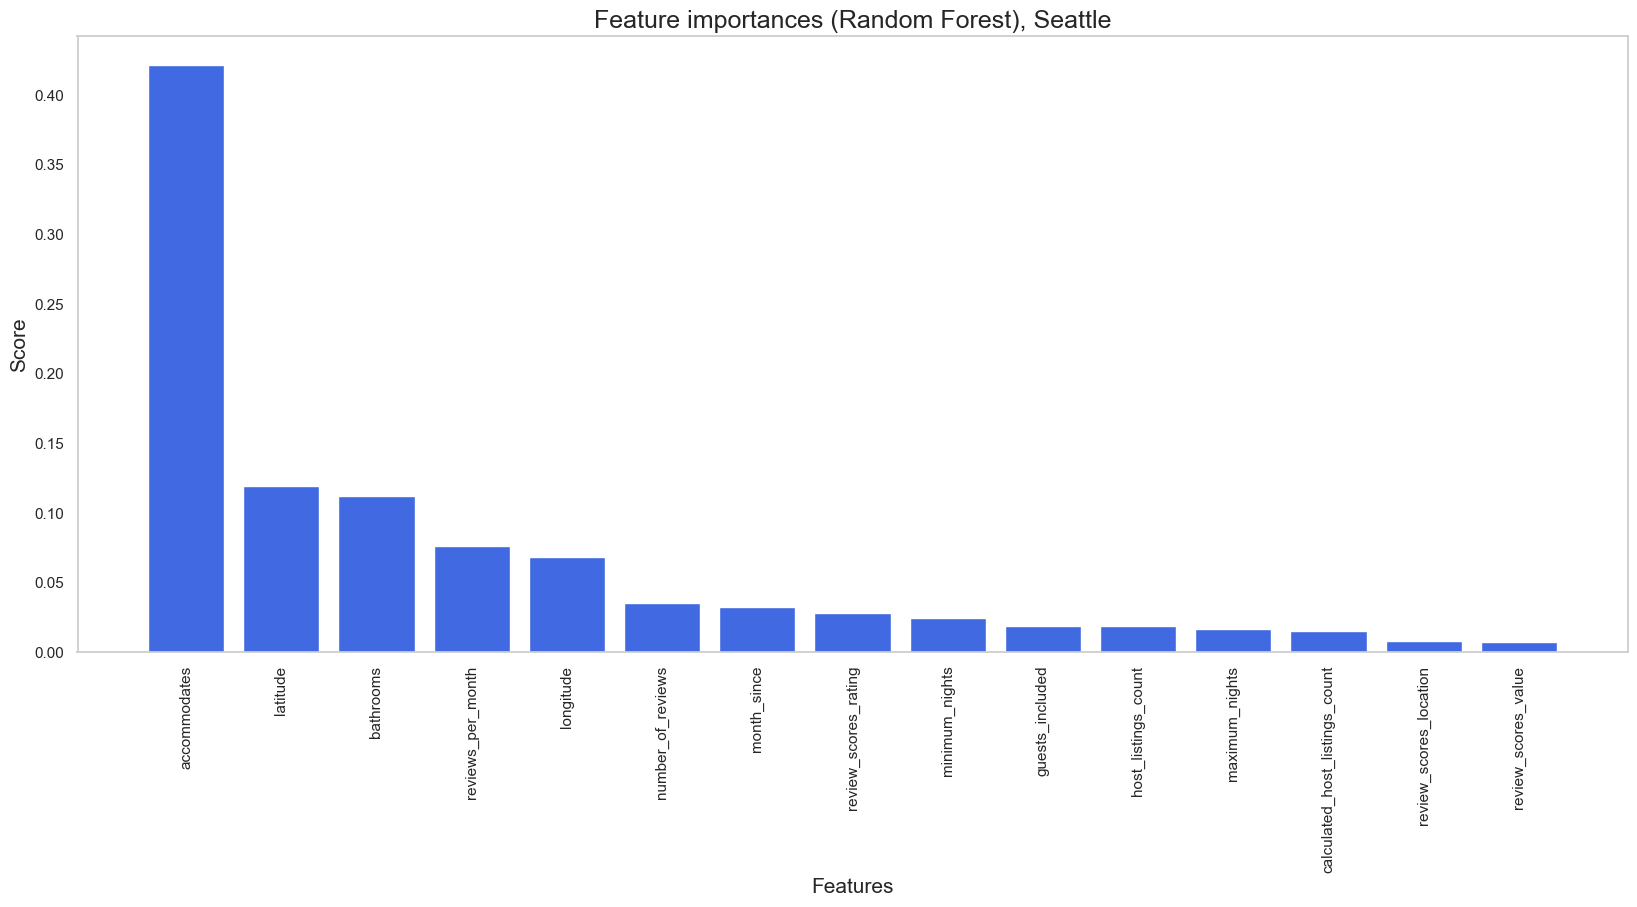

In [78]:
importance_ranker(X_train2, forest_reg2, "Feature importances (Random Forest), Seattle", "importance_ranking_sea.png")

### Key Findings

For both cities:
- Locations of Airbnb can impact prices. Generally, the closer to urban centers the pricier the Airbnb can be. And the most rated Airbnb neighborhoods are usually not distant from urban centers as well.
- Time of bookings (or checked-in) can impact prices. Generally, prices in weekends are pricier than prices on weekdays. In addition, price variation displays distinct seasonality --- which means some seasons of a city are more visited/ welcomed than other seasons. However, specific performances of seasonality may vary by cities.
- Factors such as accomodates (visitor capacity), locations (latitudes, longitudes), bathrooms, reviews per month are more associated with price variations than other factors.